<a href="https://colab.research.google.com/github/ninaguimaraes/modelo_regress-o_mkt/blob/main/Modelo%20de%20Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

#Análise Descritiva dos Dados

Etapa de explorar os dados do dataset para compreender as variáveis e identificar problemas.

Para isso, utilizei a biblioteca Pandas para importar o dataset e analisar os tipos de variáveis, se existem nulos e valores duplicados.

In [ ]:
#importando o arquivo do dataset
mkt = pd.read_csv("/content/drive/MyDrive/ANALISE DE DADOS NINA/DESAFIO4/MKT.csv")
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#buscando as infos dos dados
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#verificando se existem nulos
mkt.isnull()

,youtube,facebook,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
166,False,False,False,False
167,False,False,False,False
168,False,False,False,False
169,False,False,False,False


In [ ]:
#verificando se existem duplicados
mkt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

#Análise Exploratória

Etapa para identificar as relações entre as variáveis e descobrir os padrões relevantes.



In [ ]:
#entendendo os valores
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


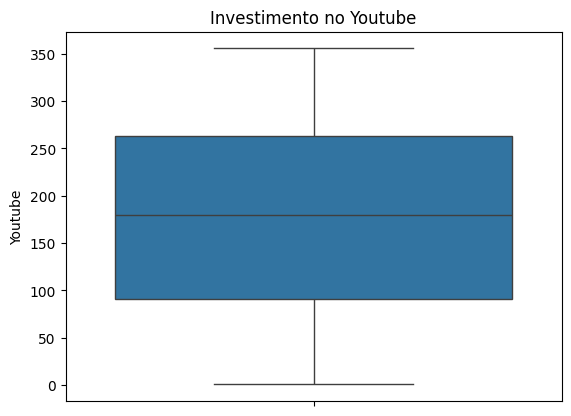

In [ ]:
#verificando se existem outliers
sns.boxplot(data=mkt["youtube"])
plt.title('Investimento no Youtube')
plt.ylabel("Youtube")
plt.show();

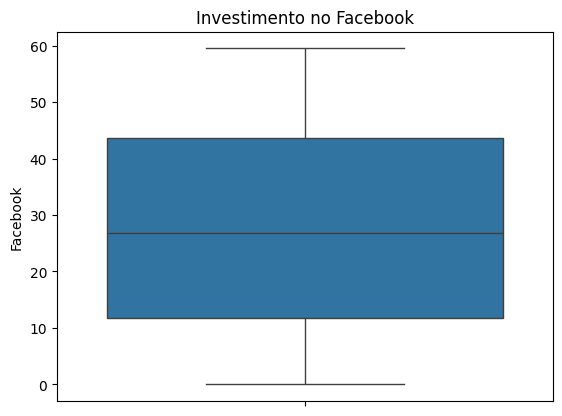

In [ ]:
#verificando se existem outliers
sns.boxplot(data=mkt["facebook"])
plt.title('Investimento no Facebook')
plt.ylabel("Facebook")
plt.show();

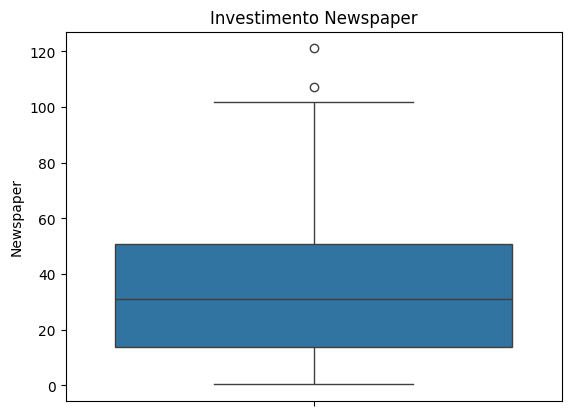

In [ ]:
#verificando se existem outliers
sns.boxplot(data=mkt["newspaper"])
plt.title('Investimento Newspaper')
plt.ylabel("Newspaper")
plt.show();

In [ ]:
#entendendo as relações entres os dados target "sales"
mkt_corr=mkt.corr()
mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


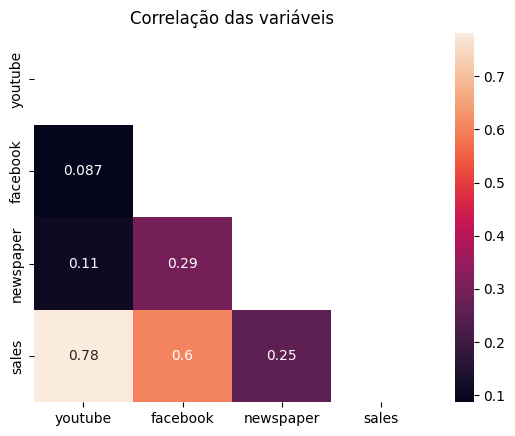

In [ ]:
#gerando o heatmap de coeficiente de correlações
mask = np.triu(np.ones_like(mkt_corr))

sns.heatmap(mkt_corr, mask=mask, annot=True)
plt.title('Correlação das variáveis')
plt.show();

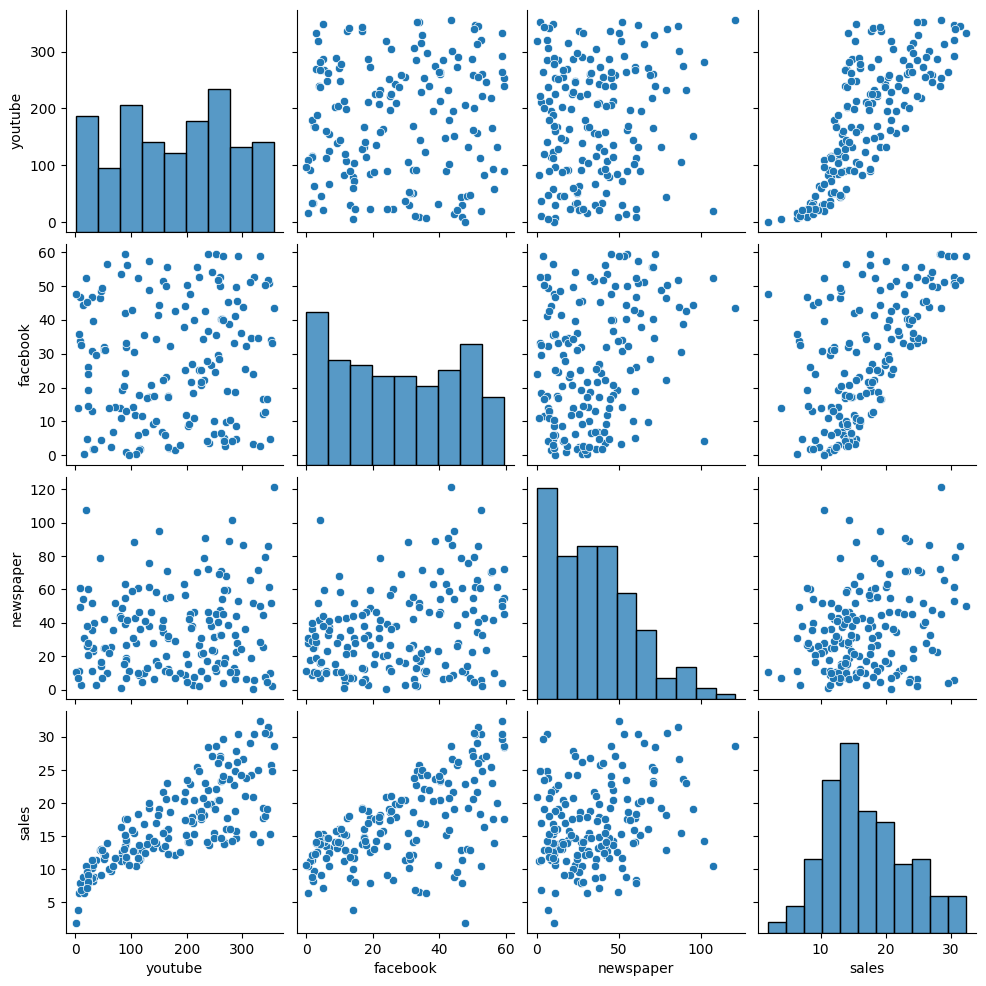

In [ ]:
#plotando gráfico de dispersão
sns.pairplot(mkt);

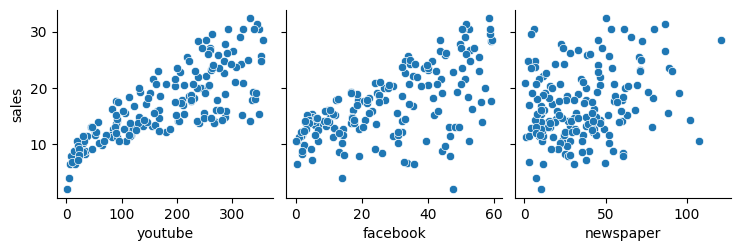

In [ ]:
sns.pairplot(mkt, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales');

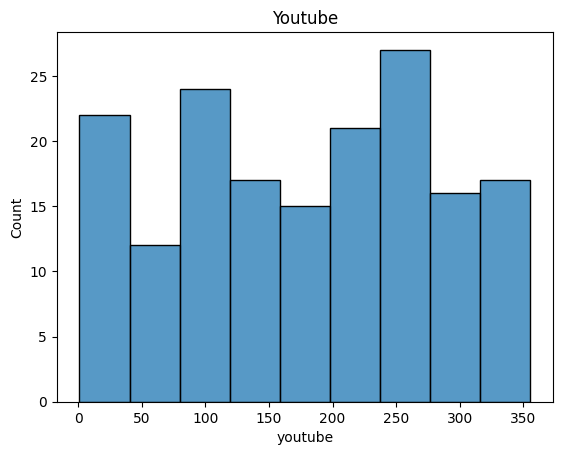

In [ ]:
#entendendo as distribuições
sns.histplot(data=mkt['youtube'])
plt.title('Youtube')
plt.show();

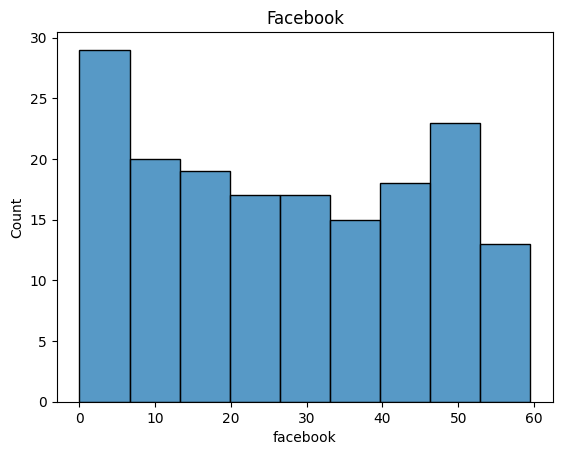

In [ ]:
#entendendo as distribuições
sns.histplot(data=mkt['facebook'])
plt.title('Facebook')
plt.show();

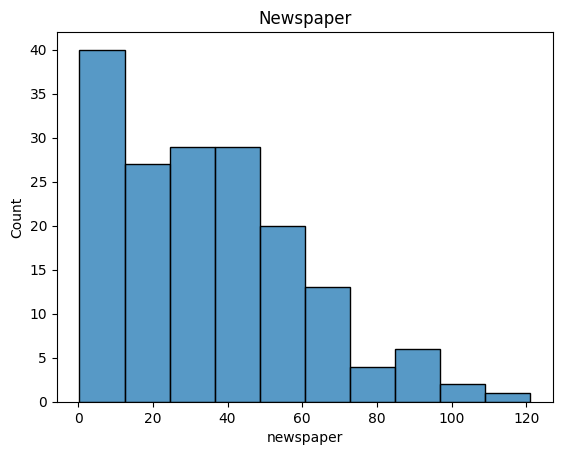

In [ ]:
#entendendo as distribuições
sns.histplot(data=mkt['newspaper'])
plt.title('Newspaper')
plt.show();

#Modelagem dos Dados

In [ ]:
#modelagem
x=mkt.drop(columns=['sales'])
y=mkt['sales'].to_frame(name='sales')

In [ ]:
#verificando se foi feito a divisão da maneira certa
display(x, y)

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


,sales
0,12.60
1,25.68
2,14.28
3,11.52
4,20.88
...,...
166,9.12
167,11.64
168,15.36
169,30.60


In [ ]:
#separando os x e y de treino e test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
#imprimindo x e y de treino e teste
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
#fazendo a regressão linear
LR = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred=LR.predict(x_test)

In [ ]:
#calculando o r2
r = r2_score(y_test,y_pred)
print('r_quadrado:', r)

r_quadrado: 0.882423505618885


#Predição dos dados

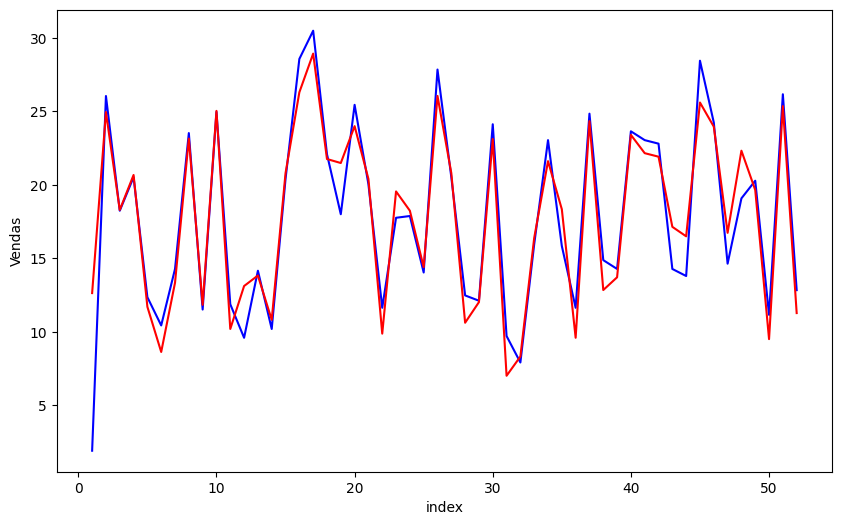

In [ ]:
#imprimindo o gráfico de predição
c = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("index")
plt.ylabel("Vendas");

In [ ]:
youtube = 350
facebook = 60
newspaper = 115
entrada = [[youtube, facebook, newspaper]]
LR.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.76069254])